# Lab 4: Scikit Learn and Regression
UIC CS 418, Spring 2023 - CC

## Academic Integrity Policy

According to the Academic Integrity Policy of this course, all work submitted for grading must be done individually, unless otherwise specified. While we encourage you to talk to your peers and learn from them, this interaction must be superficial with regards to all work submitted for grading. This means you cannot work in teams, you cannot work side-by-side, you cannot submit someone else’s work (partial or complete) as your own. In particular, note that you are guilty of academic dishonesty if you extend or receive any kind of unauthorized assistance. Absolutely no transfer of program code between students is permitted (paper or electronic), and you may not solicit code from family, friends, or online forums. Other examples of academic dishonesty include emailing your program to another student, copying-pasting code from the internet, working in a group on a homework assignment, and allowing a tutor, TA, or another individual to write an answer for you. 
If you have questions, please ask us on Piazza.
You must reference (including URLs) of any resources other than those linked to in the assignment, or provided by the professor or TA.

Academic dishonesty is unacceptable, and penalties range from failure to expulsion from the university; cases are handled via the official student conduct process described at https://dos.uic.edu/conductforstudents.shtml._

We will run your code through MOSS software to detect copying and plagiarism.

##To submit this assignment:
1. Execute all commands and complete this notebook	
2. Download your Python Notebook (**.ipynb** file) and upload it to Gradescope
under *Lab 4 (.ipynb)*. **Make sure you check that your *.ipynb* file includes all parts of your solution (including the outputs).**
2.	Export your Notebook as a python file (**.py** file) and upload it to Gradescope under *.py file for Lab 4*. 



### [Read an follow the prelab before answering the questions here](https://drive.google.com/file/d/1RVGIYL9xloKfn9SPoJoxXSiKdRhuj9RD/view?usp=sharing)

#### Exercise 1 ( 20 pts)

Perform the following tasks (TODO):

1. Load this Boston housing dataset: 
 * [info](https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.names)
 * [housing.csv](https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv) 

2. Display the first 10 rows of the dataset with column names as headers as it is shown in the [info](https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.names) file

3. Using your own judgment, select one of the 13 columns as a predictor for MEDV(Median value of owner-occupied homes in $1000's).



In [1]:
# Your code goes here
import os
import numpy as np
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
# TODO: Load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df = read_csv(url, header=None)
df = df.rename(columns={0:'CRIM', 1:'ZN', 2:'INDUS', 3:'CHAS', 4:'NOX', 5:'RM', 6:'AGE', 7:'DIS',8:'RAD'
                        ,9:'TAX', 10:'PTRATIO', 11:'B', 12:'LSTAT',13:'MEDV'})
# TODO: Display first 10 rows 
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


####Which column did you choose and why?

**Type your answer here**

The column I chose was INDUS, since a high number of non-retail businesses could indicate that the house is in an industrial area, causing the value to be lower.


4. Make a linear regression model with the feature you chose. Use `train_test_split` to keep 20% of the data for testing.
5. Use your model to predict values for test set and print the predictions for the first 10 instances of the test data and compare them with actual values. (e.g. a table with columns predicted value and actual value).
6. Print the coefficient value and its corresponding feature name (e.g.  CRIM  0.00632)  
7. Calculate training-MSE, testing-MSE, and R-squared value.

Coefficient:  INDUS -0.6244296208062123
Intercept:  29.558204609731582
r-squared: 0.32
Training Mean Squared Error: 66.99
Testing Mean Squared Error: 55.63
     MEDV  Predicted
237  31.5  25.686741
127  16.2  15.889440
442  18.4  18.256028
209  20.0  22.945495
66   19.4  27.453877
487  20.6  18.256028
56   24.7  29.096127
449  13.0  18.256028
281  35.4  27.478854
455  14.1  18.256028


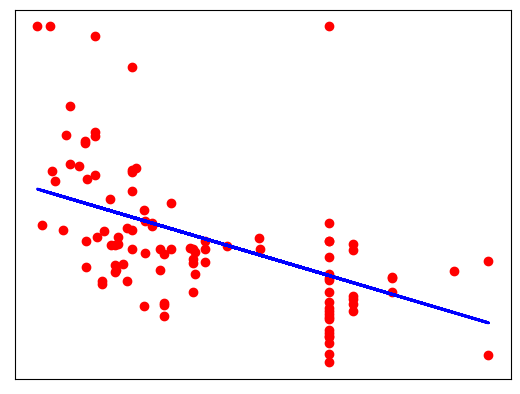

In [2]:
# Your code goes here
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
# TODO: Select ONE FEATURE for linear regression
#set the feature name here
feature = "INDUS"

#feature = df.columns.get_loc(feature)
df_Y = df['MEDV']
df_X = df[feature].to_numpy().reshape(-1,1)

# TODO: Split the data into training/testing sets
df_X_train, df_X_test, df_Y_train, df_Y_test = train_test_split(df_X, df_Y, test_size=0.2)

# TODO: Train the model 
m1 = LinearRegression(fit_intercept=True)
m1.fit(df_X_train, df_Y_train)

# TODO: Make predictions on test data 
df_Y_pred = m1.predict(df_X_test)
df_Y_pred_train = m1.predict(df_X_train)

# TODO: print the model coefficient with feature names
print('Coefficient: ', feature ,m1.coef_[0])

# TODO: print the model intercept
print('Intercept: ',m1.intercept_)

# TODO: print the r-squared
print('r-squared: %.2f' % r2_score(df_Y_test, df_Y_pred))

# TODO: print the mean squared error for training
print('Training Mean Squared Error: %.2f' % mean_squared_error(df_Y_train, df_Y_pred_train))

# TODO: print the mean squared error for testing
print('Testing Mean Squared Error: %.2f' % mean_squared_error(df_Y_test, df_Y_pred))

# Comparision
compare = pd.DataFrame(df_Y_test[:10])
compare['Predicted'] = df_Y_pred[:10]
print(compare.head(10))

# Plot 
plt.scatter(df_X_test, df_Y_test,  color='red')
plt.plot(df_X_test, df_Y_pred, color='blue', linewidth=2)

plt.xticks(())
plt.yticks(())

plt.show()

8. Make a linear regression model with **all the features** in the dataset (MEDV is not a feature, it is the value to predict). Use `train_test_split` to keep 20% of the data for testing.
9. Use your model to predict values for test set and print the predictions for the first 10 instances of the test data and compare them with actual values.
10. Print the coefficient values and their corresponding feature name 
11. Calculate training-MSE, testing-MSE, and R-squared value.

In [15]:
# Your code goes here

# TODO: Select ALL THE FEATURES for linear regression
df_Y = df['MEDV']
df_X = df.drop(columns=['MEDV'])
# TODO: Split the data into training/testing sets
df_X_train, df_X_test, df_Y_train, df_Y_test = train_test_split(df_X, df_Y, test_size=0.2)

# TODO: Train the model 
m1 = LinearRegression()
m1.fit(df_X_train, df_Y_train)

# TODO: Make predictions on test data 
df_Y_pred = m1.predict(df_X_test)
df_Y_pred_train = m1.predict(df_X_train)

# TODO: print the model coefficient with feature names
for i in range(0, len(df.columns)-1):
    print('Coefficient: ', df.columns[i] ,m1.coef_[i])

# TODO: print the model intercept
print('Intercept: ',m1.intercept_)

# TODO: print the r-squared
print('r-squared: %.2f' % r2_score(df_Y_test, df_Y_pred))

# TODO: print the mean squared error for training
print('Training Mean Squared Error: %.2f' % mean_squared_error(df_Y_train, df_Y_pred_train))

# TODO: print the mean squared error for testing
print('Testing Mean Squared Error: %.2f' % mean_squared_error(df_Y_test, df_Y_pred))

#Comparision
compare = pd.DataFrame(df_Y_test[:10])
compare['Predicted'] = df_Y_pred[:10]
print(compare.head(10))

Coefficient:  CRIM -0.11819537730423303
Coefficient:  ZN 0.04750765605934418
Coefficient:  INDUS 0.01597120222130022
Coefficient:  CHAS 2.7072630060557477
Coefficient:  NOX -18.423575186134443
Coefficient:  RM 4.022101330483638
Coefficient:  AGE 0.0009061028704506193
Coefficient:  DIS -1.4739528445497116
Coefficient:  RAD 0.2739279893931638
Coefficient:  TAX -0.01165223284607473
Coefficient:  PTRATIO -0.915445717533432
Coefficient:  B 0.00835980263947501
Coefficient:  LSTAT -0.4816326360282502
Intercept:  34.7498685772038
r-squared: 0.76
Training Mean Squared Error: 22.11
Testing Mean Squared Error: 21.41
     MEDV  Predicted
197  30.3  32.965994
111  22.8  26.684502
441  17.1  17.212904
240  22.0  27.546970
365  27.5  13.154785
72   22.8  24.485172
407  27.9  19.493361
473  29.8  25.418071
321  23.1  24.857137
23   14.5  14.303653


#### Compare the two models (with all the features versus one feature). Which model has a better performance? Why?


**Type your answer here**

#### Exercise 2 (15 pts)

1.   Use `RFE` to select the two most important features.
2.   Make a Linear regression model using the features that `RFE` selected. 
3.   Calculate and print both train and test MSE and R-squared values, and compare this model with the models from 3.1.  

In [4]:
# Your code goes here 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

df_Y_train = df['MEDV']
df_X_train = df.drop(columns=['MEDV'])
rfe = RFE(estimator = LinearRegression(), n_features_to_select = 2 , step = 1)
rfe.fit(df_X_train, df_Y_train)
print(rfe.support_)
print(rfe.ranking_)

rfe.get_support(True)


[False False False False  True  True False False False False False False
 False]
[ 7  9  8  2  1  1 12  4  6 10  3 11  5]


array([4, 5], dtype=int64)

In [17]:
#setting the feature names to use from the values returned by RFE above
support = []
for i in range(0,len(rfe.get_support(True))):
    temp = df.columns[rfe.get_support(True)[i]]
    support.append(temp)
    print(temp)
df_Y = df['MEDV']
df_X = df[support]


# Split the data into training/testing sets
df_X_train, df_X_test, df_Y_train, df_Y_test = train_test_split(df_X, df_Y, test_size=0.2)

# Train the model 
m1 = LinearRegression()
m1.fit(df_X_train, df_Y_train)

# Make predictions on training and test data 
df_Y_pred = m1.predict(df_X_test)
df_Y_pred_train = m1.predict(df_X_train)

# print the model coefficient with feature names
print('Coefficient:');
for i in range(0, len(rfe.get_support(True))):
    print( df.columns[rfe.get_support(True)[i]] ,m1.coef_[i])
    
# print the model intercept
print('Intercept: ',m1.intercept_)

# print the r-squared
print('r-squared: %.2f' % r2_score(df_Y_test, df_Y_pred))

# print the mean squared error for training
print('Training Mean Squared Error: %.2f' % mean_squared_error(df_Y_train, df_Y_pred_train))

# print the mean squared error for testing
print('Testing Mean Squared Error: %.2f' % mean_squared_error(df_Y_test, df_Y_pred))

CHAS
NOX
RM
DIS
PTRATIO
LSTAT
Coefficient:
CHAS 3.98907928959035
NOX -16.45579318919895
RM 4.363579629988079
DIS -1.0777038921605433
PTRATIO -0.8844070028490361
LSTAT -0.5742352739691778
Intercept:  31.564703570262644
r-squared: 0.75
Training Mean Squared Error: 23.68
Testing Mean Squared Error: 25.87


#### Explain your observation. What are the important features found using RFE?

**Type your answer here**

#### Compare the three models (with one feature, two features and all the features versus). Which model has a better performance? 


Using any one random feature has very low performance, since we do not know which feature is more important for our model.
This gives us an R2 score of just 0.32.
Using all the features is a lot more accurate, as is using the two most important features which we get from RFE.
The second and third models have very close performance, with R2 scores of 0.72 and 0.75 respectively.

In [6]:
# Your code goes here 


### Linear regression on the Boston house price dataset

Now it's your turn to perform a linear regression on the **Boston housing** dataset.

 #### Exercise 3  ( 15 pts)
 
Let's build models with different training sizes to predict the house prices for boston house dataset. Each model should use all the available features. The goal is to train multiple linear regression models for the following train-test splits and calculate and visualize their MSE:

1.   30% training, 70% testing 
2.   40% training, 60% testing
3.   50% training, 50% testing
4.   60% training, 40% testing
5.   70% training, 30% testing
6.   80% training, 20% testing. (done previously)


*Note: For simplicity, make a function that builds and fits the linear model and returns MSE for test.*

In [7]:
#Your code goes here

import warnings
warnings.filterwarnings('ignore')

MSE = []
y = df['MEDV']
x = df.drop(columns=['MEDV'])
def calcMSE(testsize):
    boston_X_train, boston_X_test, boston_Y_train, boston_Y_test = train_test_split(x, y, test_size=testsize)
    m1 = LinearRegression()
    m1.fit(boston_X_train, boston_Y_train)

    # TODO: Make predictions on test data 
    boston_Y_pred = m1.predict(boston_X_test)
    #boston_Y_pred_train = m1.predict(boston_X_train)
    #print('Testing Mean Squared Error: %.2f' % mean_squared_error(boston_Y_test, boston_Y_pred))
    return mean_squared_error(boston_Y_test, boston_Y_pred)

for i in range(2,8):
    temp = [i*10,calcMSE(i/10)]
    MSE.append(temp)

MSE = pd.DataFrame(MSE, columns=['TEST SIZE','MSE'])
MSE

,TEST SIZE,MSE
0,20,16.935455
1,30,21.714959
2,40,24.512338
3,50,26.523063
4,60,24.644636
5,70,26.086790



Plot the test MSE values for all models with respect to the training size.  

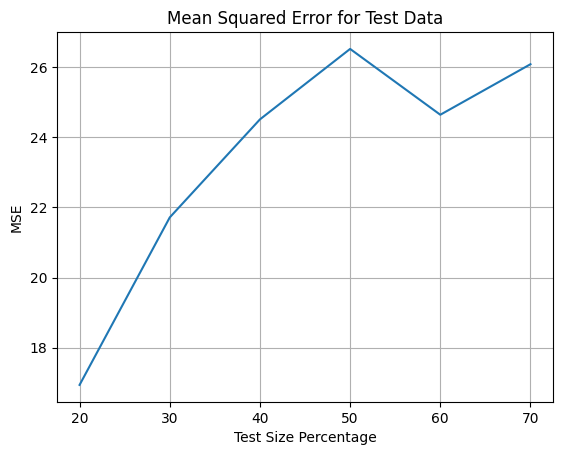

In [8]:
#Your code goes here
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes()
plt.grid(True)
x = np.linspace(0, 10, 1000)
#plt.xlim(10, 80)
#plt.ylim(8000,15000)
#ax.set_xticks(np.arange(10, 80, 10))
#ax.set_yticks(np.arange(8000, 15000, 500))
plt.title("Mean Squared Error for Test Data")
plt.xlabel("Test Size Percentage")
plt.ylabel("MSE")
plt.plot('TEST SIZE', 'MSE', data=MSE)


 #### Exercise 4  ( 30 pts)
 
 Next, we want to use `RFE` to find the best set of features for prediction. When we used `RFE` in 3.2, we chose an arbitrary value for number of features. In practice, we don't know the best number of features to select for `RFE`, so we have to test different values. In this case, the number of features is the hyperparameter that we want to tune. 
Typically, we use cross validation for tuning hyperparameters. 

Recall that cross validation is a technique where we split our data into equal folds and then use one fold for testing and the rest for training. We can use `KFold` [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) form scikit learn `model_selection` to split our data into desired folds. We can also use `cross_val_score` [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to evaluate a score by cross validation. 
 

For this exercise, use `RFE` with cross-validation (K = 5 aka 5fold) to find the best set of features for prediction. 


 - Make an RFE model with i number of features
 - Create a 5-fold CV on the data set 
 - Fit the model with Cross validation using the best features and store the MSE values
 - Draw a box plot for MSE values of each model and pick the best number of features

Note that the Boston housing data set contains 13 features, so you must create 13 models (one per each i best features selected with RFE) and use that model with 5-fold CV. At the end, you should have 13 models with 5 MSE values for each model (results of CV). 

Plot a side-by-side boxplot and compare the distribution of MSE values for these 13 models. 





In [9]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#Your code goes here

import warnings
warnings.filterwarnings('ignore')

# Code starts here 
y = df['MEDV']
x = df.drop(columns=['MEDV'])

kf = KFold(n_splits=5)
plotdata = []
featurelist=[]
m1=LinearRegression()
for i in range (1,14):
    y_d = y
    x_d = x
    rfe = RFE(estimator = LinearRegression(), n_features_to_select = i , step = 1)
    rfe.fit(x_d, y_d)
    support = []
    for k in range(0,len(rfe.get_support(True))):
        temp = x_d.columns[rfe.get_support(True)[k]]
        support.append(temp)
    featurelist.append(rfe.get_support(True))
    X_data = x_d[support]
    for j in range (0, 5):
        temp = [i,-1*cross_val_score(m1, X_data, y, scoring='neg_mean_squared_error', cv=kf)[j]]
        plotdata.append(temp)
plotdata = pd.DataFrame(plotdata, columns=['Features','CV'])
plotdata

,Features,CV
0,1,45.211197
1,1,82.509662
2,1,130.819023
3,1,83.141219
4,1,46.325416
...,...,...
60,13,12.460301
61,13,26.048621
62,13,33.074138
63,13,80.762371


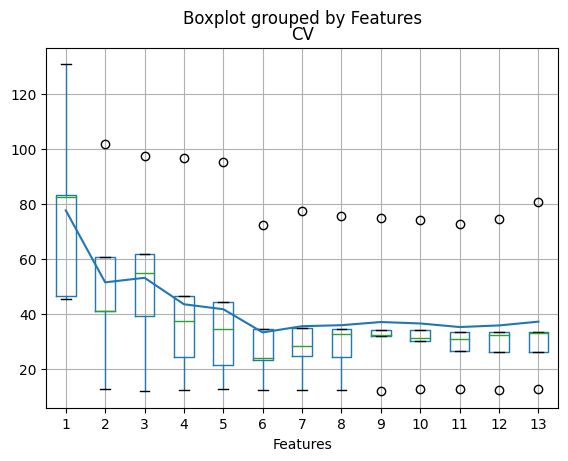

In [10]:
# Creating plot
plotdata.boxplot(column = 'CV', by = 'Features')
plt.plot(plotdata.groupby('Features').mean())
#print(plotdata.groupby('Features').mean())

In [11]:
print(featurelist[5])
for i in featurelist[5]:
    print(df.columns[i])

[ 3  4  5  7 10 12]
CHAS
NOX
RM
DIS
PTRATIO
LSTAT


Based on the previous plot, pick the model with lowest average MSE as the best result. What is the best number of features? Which features are selected?

The lowest average MSE is when we have 6 features. These are:
CHAS
NOX
RM
DIS
PTRATIO
LSTAT

#### Exercise 5 (10 pts)

Another way of doing RFE with CV is using `RFECV` [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html#sklearn.feature_selection.RFECV) which performs the same task as `RFE` while performing a cross validation task. 
Use `RFECV` to find the best number of features for a regression model for Boston housing data set.  Which features are selected? (you can use `ranking_` attribute)

Some Notes: 

- For `scoring` parameter you can use `neg_mean_squared_error` to get MSE. You can read [model evaluation documentation](https://scikit-learn.org/stable/modules/model_evaluation.html) to learn what values you can pass for this parameter

- The default value for `cv` parameter in `RFECV` model is 5-fold cross-validation

- Your results for RFE may vary (values with different numerical precision) given the stochastic nature of the algorithm and evaluation process.

- Specifying random_state parameter ensures the same random partitions are used across different runs 

- Read the documentation to learn more about parameters and attributes for each model we discussed.

In [12]:
#Your code goes here
from sklearn.feature_selection import RFECV
#Your code goes here

import warnings
warnings.filterwarnings('ignore')

# Code starts here 
y = df['MEDV']
x = df.drop(columns=['MEDV'])

rfe = RFECV(LinearRegression(), step=1, cv=5, scoring = 'neg_mean_squared_error')
rfe = rfe.fit(x, y)
print("Feature ranking: ", rfe.ranking_)
for i in rfe.get_support(True):
    print(df.columns[i])
#for i in range (0,len(rfe.cv_results_)):
#print(rfe.cv_results_)

Feature ranking:  [3 5 4 1 1 1 8 1 2 6 1 7 1]
CHAS
NOX
RM
DIS
PTRATIO
LSTAT


### Which features are selected?

The columns that were selected were: 

CHAS
NOX
RM
DIS
PTRATIO
LSTAT

#### Exercise 6 ( 10 pts)

The Boston housing prices dataset has an ethical problem. Describe here why.


The dataset takes into account the number of african-american people living in a town in the column `B`, which implies that this affects housing prices in some way. This implication that the racial composition of a neighbourhoods affects house values is harmful and inaccurate.
